## Imports

In [1]:
# utils
import os
import sys
from pathlib import Path

PROJECT_DIR = Path.cwd().parent
sys.path.append(str(PROJECT_DIR))

# basics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

# metrics
from utils import config
from utils.plot.plot import GeneratePlots
from utils.reader import read_file_yaml
from utils.utils import get_last_modification_directory, set_params

np.random.seed(0)

## Reading datasets

In [2]:
path_outputs_url = PROJECT_DIR / "outputs"
path_data_url = PROJECT_DIR / "data"
file_path_parameters = PROJECT_DIR / "conf" / "parameters.yml"
parameters = read_file_yaml(file_path_parameters)
path_results_url = PROJECT_DIR / parameters["results"]["filepath"]

n_random = np.sort(
    [int(i.replace("random_n", "")) for i in os.listdir(path_results_url) if ".placehold" not in i]
)
path_random = ["random_n" + str(i) for i in n_random]
path_results = [path_results_url / i for i in path_random]

_, path_random = get_last_modification_directory(path_results, path_random, parameters)

ext_type = parameters["outputs"]["extension_type"]
ext_local_img = parameters["outputs"]["extension_local_img"]
ext_best_img = parameters["outputs"]["extension_best_img"]

In [3]:
path_data = {i: path_data_url / i for i in config.file_names}
path_params = {i: {j: path_results_url / i / j / "params" for j in config.file_names} for i in path_random}

In [4]:
data = {
    i_name: pd.read_csv(i_url / Path(i_name + f"{ext_type}"))
    if f"{i_name}_pca{ext_type}" not in os.listdir(i_url)
    else pd.read_csv(i_url / Path(i_name + "_pca" + ext_type))
    for i_name, i_url in path_data.items()
}

In [5]:
params = {}
for i_random, i_content in path_params.items():
    params[i_random] = {}
    for j_name, j_content in i_content.items():
        params[i_random][j_name] = {}
        for which in ["abilities", "diff_disc"]:
            try:
                params[i_random][j_name][which] = pd.read_csv(j_content / Path(which + ext_type), index_col=0)
            except Exception:
                continue

## Plot of difficulties

In [ ]:
figs = {}
for i_random, i_content in tqdm(list(params.items())):
    _plt_parameters = set_params(data, i_content)
    gp = GeneratePlots(data=data)
    fig, _ = gp.scatterplot_diff_disc(
        len(_plt_parameters.keys()), 2, plot_parameters=_plt_parameters, figsize=(20, len(config.file_names) + 12)
    )
    figs[i_random] = fig
    plt.close()

In [ ]:
i_figs_unique = {}
for i in tqdm(config.file_names):
    i_figs_unique[i] = {}
    for i_random, i_content in list(params.items()):
        _plt_parameters = set_params({i: data[i]}, i_content)
        gp = GeneratePlots(data={i: data[i]})
        fig, _ = gp.scatterplot_diff_disc_unique(
            1, 2, plot_parameters={i: _plt_parameters[i]}, figsize=(22, 7)
        )
        i_figs_unique[i][i_random] = fig
        plt.close()

In [9]:
# viz
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


class GeneratePlots:
    def __init__(self, pij=None, data=None):
        self.pij = pij
        self.data = data

    def _scatterplot(self,
                    nrows=1,
                    ncols=1,
                    figsize=(18, 18),
                    plot_parameters=None,
                    fontsize=20,
                    xlabel="$pca_{(1)}$", 
                    ylabel="$pca_{(2)}$"):
        _fig = {}
        for which_param in plot_parameters:
            (name, _, params) = which_param
            fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
            points = axes.scatter(**params)
            # axes.set_title(name)
            axes.set_xlabel(xlabel, fontsize=fontsize)
            axes.set_ylabel(ylabel, fontsize=fontsize)
            fig.colorbar(points, ax=axes)
            fig.tight_layout()
            _fig[name] = fig
            plt.close()
        return _fig
        
    def scatterplot(self,
                    nrows=1,
                    ncols=1,
                    figsize=(18, 18),
                    plot_parameters=None,
                    fontsize=20,
                    xlabel="$pca_{(1)}$", 
                    ylabel="$pca_{(2)}$"):
        _fig = {}
        (name_diff, _, params_diff), (name_disc, _, params_disc)  = plot_parameters[0], plot_parameters[1] 
        params_diff["s"] = ((params_disc["c"] - params_disc["c"].min())/(params_disc["c"].max() - params_disc["c"].min())) * 100
        fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
        points = axes.scatter(**params_diff)
        axes.set_xlabel(xlabel, fontsize=fontsize)
        axes.set_ylabel(ylabel, fontsize=fontsize)
        fig.colorbar(points, ax=axes)
        fig.tight_layout()
        _fig[name_diff] = fig
        plt.close()
        return _fig


In [18]:
params_general = {
    "nrows": 1,
    "ncols": 1,
    "figsize": (10,8),
    "fontsize": 26
}
i_figs_unique_param = {}
for i in tqdm(["varied", "breast_cancer", "aniso"]):#config.file_names):
    i_figs_unique_param[i] = {}
    for i_random, i_content in list(params.items()):
        _plt_parameters = set_params({i: data[i]}, i_content)
        gp = GeneratePlots(data={i: data[i]})
        params_general.update({"plot_parameters": _plt_parameters[i]})
        if i not in ["wine", "iris", "breast_cancer", "diabetes", "digits"]:
            print(i)
            params_general.update({"xlabel": r"$x_{1}$", "ylabel": r"$x_{2}$"})
        fig = gp.scatterplot(
            **params_general
        )
        i_figs_unique_param[i][i_random] = fig
        plt.close()

  0%|                                                                                                                                                                                        | 0/3 [00:00<?, ?it/s]

varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied
varied


 33%|██████████████████████████████████████████████████████████▋                                                                                                                     | 1/3 [00:04<00:09,  4.99s/it]

varied
varied
varied


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 2/3 [00:09<00:04,  4.83s/it]

aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso
aniso


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.64s/it]


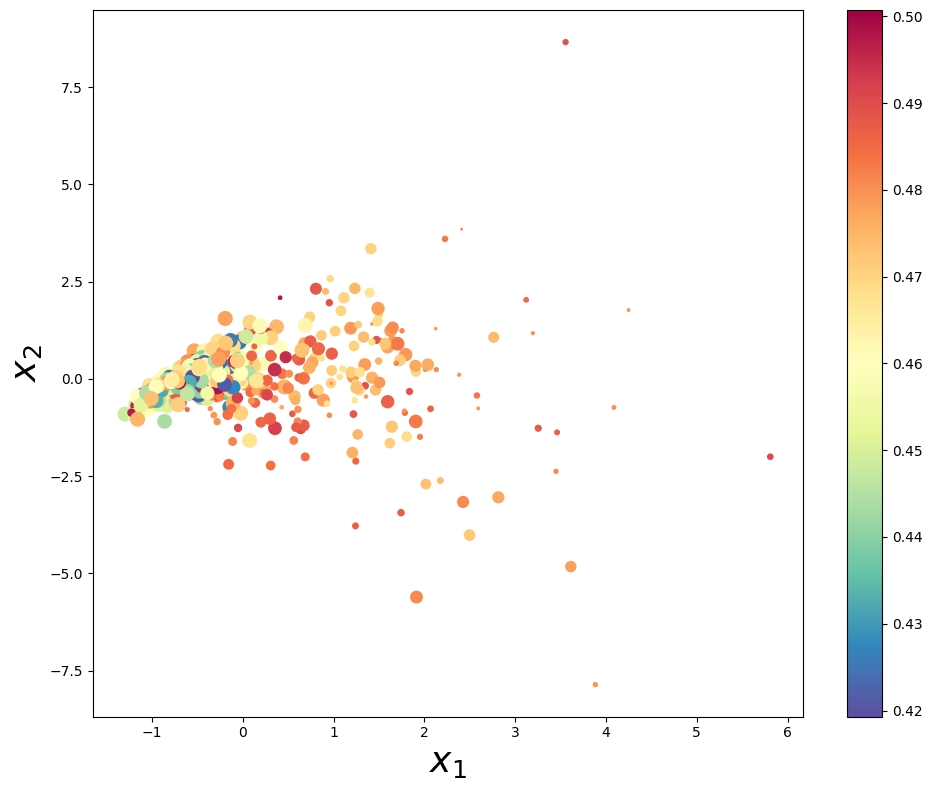

In [19]:
i_figs_unique_param["breast_cancer"]["random_n0"]["difficulties"]#["varied"]["random_n0"]["difficulties"]

## Save

In [ ]:
for i_random, i_content in tqdm(figs.items()):
    i_content.savefig(
        path_outputs_url / Path(i_random + "_" + "diff_disc_all" + ext_best_img), format=ext_best_img[1:]
    )  # eps format
    i_content.savefig(
        path_outputs_url / Path(i_random + "_" + "diff_disc_all" + ext_local_img), format=ext_local_img[1:],
        **parameters["outputs"]["args"]
    )  # png format

In [16]:
for i_name, i_content in tqdm(list(i_figs_unique_param.items())):
    for j_random, j_content in list(i_content.items())[:1]:
        for which_param, k_figure in j_content.items():
            k_figure.savefig(
                path_outputs_url / Path(i_name + "_" + j_random + "_" + which_param + ext_best_img),
                format=ext_best_img[1:]
            )  # eps format
            k_figure.savefig(
                path_outputs_url / Path(i_name + "_" + j_random + "_" + which_param + ext_local_img),
                format=ext_local_img[1:],
                **parameters["outputs"]["args"]
            )  # png format

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.35it/s]


In [ ]:
# 2, 